# table of content 
 
 ● [Introduction](#Introduction)
 
 ● [Ask](#Ask)
 
 ● [Prepare](#Prepare)

 ● [Process](#Process)
 
 ● [Analyze](#Analyze)  
 
 ● [Share](#Share)
 
 ● [Act](#Act)

# Introduction
Welcome to the Cyclistic bike-share analysis case study! In this case study, you will perform many real-world tasks of a junior
data analyst. You will work for a fictional company, Cyclistic, and meet different characters and team members. In order to
answer the key business questions, you will follow the steps of the data analysis process: ask, prepare, process, analyze,
share, and act. Along the way, the Case Study Roadmap tables — including guiding questions and key tasks — will help you
stay on the right path.
## Scenario
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
must approve your recommendations, so they must be backed up with compelling data insights and professional data
visualizations.
## Characters and teams(Key Stakholders)
● Lily Moreno: The director of marketing (Primary Stakeholders)

● Cyclistic executive team (Primary Stakeholders)

● Cyclistic marketing analytics team (Secondary Stakeholders:)







# Ask
Three questions will guide the future marketing program:
  1. How do annual members and casual riders use Cyclistic bikes differently?
  2. Why would casual riders buy Cyclistic annual memberships?
  3. How can Cyclistic use digital media to influence casual riders to become members?
  
 <a id="Guidingquestions"></a>
 
## Guiding questions
  
   ### ● What is the problem you are trying to solve?
  - The main objective is to determine a way to build a profile for annual members and the best marketing strategies to   
  
  -   turn casual bike riders into annual members.
  ### How can your insights drive business decisions?
- The insights will help the marketing team to increase annual members.

<a id="Keytasks"></a>

## Key tasks
1. Identify the business task
2. Consider key stakeholders


## Deliverable
1. A clear statement of the business task

- Find the keys differences between casual and members riders and how digital midia could influence them

# Prepare

   ## data structure
   
   we will use Cyclistic’s historical trip data to analyze and identify trend on an AWS page:(https://divvy-tripdata.s3.amazonaws.com/index.html) and we will Download the previous 12 months of Cyclistic trip data from Feb 2022 until 2023
   
Each file contains a dataset with 13 columns and thousands of observations
<a id="prepGuidingquestions"></a>
## Guiding questions
### ●Where is your data located?
The data is located in my device and downloaded from (https://divvy-tripdata.s3.amazonaws.com/index.html).
### ● How is the data organized?
seperated into 12 Each month in its own csv file
### ● Are there issues with bias or credibility in this data ROCCC?
There is no bias because the data set represents cyclists, but there is some loss in the names of the stations. Is this due to the lack of sufficient signage or another reason that we will see during the analysis
### ● How are you addressing licensing, privacy, security, and accessibility?
According to the company, it owns a license to the dataset. In addition, the data contains personal information about the riders
### ● How did you verify the data’s integrity?
All the files have consistent columns and each column has the correct type of data.
### ● How does it help you answer your question?
It  have some key insights about the riders and their riding style and type
### ● Are there any problems with the data?
You are missing some information such as the name of the stations so It would be good to have some updated information about the bike station

 <a id="prepKeytasks" > </a>
## Key tasks
1. Download data and store it appropriately.
2. Identify how it’s organized.
3. Sort and filter the data.
4. Determine the credibility of the data.
<a id="prepDeliverable"> </a>
## Deliverable
● A description of all data sources used(https://divvy-tripdata.s3.amazonaws.com/index.html)




# Process
prepare the data for analysis 

●Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import glob 

### style

In [2]:
plt.style.use('ggplot')

### import data from the device

In [3]:
path = 'E:/the previous 12 months/'
all_files = glob.glob('E:/the previous 12 months/' + "*.csv")
dfs = []
for file in all_files:
    df=pd.read_csv(file)
    dfs.append(df)




### Concatenating
All the csvs files will be concatenated into one dataframe.

In [5]:
concat_dat=pd.concat(dfs,ignore_index=True)
data=pd.DataFrame(concat_dat)

### data cleaning 

In [7]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    843525
start_station_id      843525
end_station_name      902655
end_station_id        902655
start_lat                  0
start_lng                  0
end_lat                 5899
end_lng                 5899
member_casual              0
dtype: int64

"One thing that stands out in this point is the absence of labels for a large number of start and end station names. This will be taken into consideration and investigated during the analysis process."

### Separate some columns
Separate started_at , ended_at  into time and data

In [6]:
data[['st_date','st_time']]=data.started_at.str.split(expand=True)

In [7]:
data[['end_date','end_time']]=data.ended_at.str.split(expand=True)

### Manipulating data 
Change the data type of columns(started_at ,and ended_at)



In [8]:
data["started_at"]=pd.to_datetime(data["started_at"])
data['ended_at']=pd.to_datetime(data['ended_at'])

### Change the data type of the new columns

In [9]:
data['st_date']=pd.to_datetime(data['st_date'])
data['end_date']=pd.to_datetime(data['end_date'])
data['end_time']=pd.to_datetime(data['end_time'])
data['st_time']=pd.to_datetime(data['st_time'])

#### New columns will help and be useful to determine patterns

#### day_of_week ,ord_day, hour, name_day, name_month ,num_month ,total_ride_length

In [10]:
data['day_of_week'] = data['started_at'].dt.dayofweek

In [10]:
data['hour']=data.st_time.dt.hour

In [11]:
data['ord_day']=data.started_at.dt.day_of_year

In [12]:
data['name_day']=data.st_date.dt.day_name()


In [13]:
data['name_day']=data.st_date.dt.day_name()


In [14]:
data['name_month']=data.started_at.dt.month_name()


In [15]:
data['num_month']=data.started_at.dt.month

In [16]:
data['total_ride_length']=data['ended_at']-data['started_at']

In [17]:
data['total_ride_length']=pd.to_numeric(data['total_ride_length'])/6e+10

### remove negative value in ride length 

In [18]:
data=data.drop(data[data['total_ride_length']<1].index)

In [19]:
data[data['total_ride_length']<1].count()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
st_date               0
st_time               0
end_date              0
end_time              0
day_of_week           0
hour                  0
ord_day               0
name_day              0
name_month            0
num_month             0
total_ride_length     0
dtype: int64

### show the top and last 5 of dataset

In [20]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,st_time,end_date,end_time,day_of_week,hour,ord_day,name_day,name_month,num_month,total_ride_length
0,E1E065E7ED285C02,classic_bike,2022-02-19 18:08:41,2022-02-19 18:23:56,State St & Randolph St,TA1305000029,Clark St & Lincoln Ave,13179,41.884621,-87.627834,...,2023-04-05 18:08:41,2022-02-19,2023-04-05 18:23:56,5,18,50,Saturday,February,2,15.250000
1,1602DCDC5B30FFE3,classic_bike,2022-02-20 17:41:30,2022-02-20 17:45:56,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,41.929143,-87.649077,...,2023-04-05 17:41:30,2022-02-20,2023-04-05 17:45:56,6,17,51,Sunday,February,2,4.433333
2,BE7DD2AF4B55C4AF,classic_bike,2022-02-25 18:55:56,2022-02-25 19:09:34,State St & Randolph St,TA1305000029,Canal St & Adams St,13011,41.884621,-87.627834,...,2023-04-05 18:55:56,2022-02-25,2023-04-05 19:09:34,4,18,56,Friday,February,2,13.633333
3,A1789BDF844412BE,classic_bike,2022-02-14 11:57:03,2022-02-14 12:04:00,Southport Ave & Waveland Ave,13235,Broadway & Sheridan Rd,13323,41.948150,-87.663940,...,2023-04-05 11:57:03,2022-02-14,2023-04-05 12:04:00,0,11,45,Monday,February,2,6.950000
4,07DE78092C62F7B3,classic_bike,2022-02-16 05:36:06,2022-02-16 05:39:00,State St & Randolph St,TA1305000029,Franklin St & Lake St,TA1307000111,41.884621,-87.627834,...,2023-04-05 05:36:06,2022-02-16,2023-04-05 05:39:00,2,5,47,Wednesday,February,2,2.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5754243,A303816F2E8A35A8,electric_bike,2023-01-11 17:46:23,2023-01-11 17:57:31,Clark St & Elm St,TA1307000039,Southport Ave & Clybourn Ave,TA1309000030,41.902634,-87.631591,...,2023-04-05 17:46:23,2023-01-11,2023-04-05 17:57:31,2,17,11,Wednesday,January,1,11.133333
5754244,BCDBB142CC610382,classic_bike,2023-01-30 15:08:10,2023-01-30 15:33:26,Western Ave & Leland Ave,TA1307000140,Clarendon Ave & Gordon Ter,13379,41.966400,-87.688704,...,2023-04-05 15:08:10,2023-01-30,2023-04-05 15:33:26,0,15,30,Monday,January,1,25.266667
5754245,7D1C7CA80517183B,classic_bike,2023-01-06 19:34:50,2023-01-06 19:50:01,Clark St & Elm St,TA1307000039,Southport Ave & Clybourn Ave,TA1309000030,41.902973,-87.631280,...,2023-04-05 19:34:50,2023-01-06,2023-04-05 19:50:01,4,19,6,Friday,January,1,15.183333
5754246,1A4EB636346DF527,classic_bike,2023-01-13 18:59:24,2023-01-13 19:14:44,Clark St & Elm St,TA1307000039,Southport Ave & Clybourn Ave,TA1309000030,41.902973,-87.631280,...,2023-04-05 18:59:24,2023-01-13,2023-04-05 19:14:44,4,18,13,Friday,January,1,15.333333


### data statistics(describe) 

In [21]:
data.describe()

,start_lat,start_lng,end_lat,end_lng,day_of_week,hour,ord_day,num_month,total_ride_length
count,5.630811e+06,5.630811e+06,5.624914e+06,5.624914e+06,5.630811e+06,5.630811e+06,5.630811e+06,5.630811e+06,5.630811e+06
mean,4.190217e+01,-8.764772e+01,4.190238e+01,-8.764781e+01,3.052712e+00,1.421309e+01,1.977897e+02,7.017391e+00,1.972237e+01
std,4.626461e-02,2.927986e-02,6.587088e-02,1.021051e-01,1.975725e+00,5.028161e+00,7.962029e+01,2.618064e+00,1.771660e+02
min,4.164000e+01,-8.784000e+01,0.000000e+00,-8.814000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,4.188103e+01,-8.766150e+01,4.188103e+01,-8.766201e+01,1.000000e+00,1.100000e+01,1.450000e+02,5.000000e+00,6.000000e+00
50%,4.190000e+01,-8.764410e+01,4.190000e+01,-8.764414e+01,3.000000e+00,1.500000e+01,2.010000e+02,7.000000e+00,1.043333e+01
75%,4.193000e+01,-8.762956e+01,4.193000e+01,-8.762963e+01,5.000000e+00,1.800000e+01,2.580000e+02,9.000000e+00,1.861667e+01
max,4.207000e+01,-8.752000e+01,4.237000e+01,0.000000e+00,6.000000e+00,2.300000e+01,3.650000e+02,1.200000e+01,4.138725e+04


## member

In [22]:
member=data[data.member_casual=='member'] 

## casual 

In [23]:
casual=data[data.member_casual=='casual']

## Guiding questions
### ● What tools are you choosing and why?

   - I'm using python for this project,becouse my experience with this language. and the library it contain that deal with large dataset

### ● Have you ensured your data’s integrity?

- Yes 

### ● What steps have you taken to ensure that your data is clean?
 
 - drop the duplicated rows and and change some format like datatype
 
### ● How can you verify that your data is clean and ready to analyze?

  - I did some operations on this notebook

### ● Have you documented your cleaning process so you can review and share those results?
  
 - Yes, it's all documented in this notebook

## Key tasks
1. Check the data for errors.
2. Choose your tools.
3. Transform the data so you can work with it effectively.
4. Document the cleaning process.

## Deliverable
● Documentation of any cleaning or manipulation of data


# Analyze


## code

## member_casual distribution graph

In [24]:
d=data.member_casual.value_counts()
d=pd.DataFrame(d)
d

,member_casual
member,3335393
casual,2295418


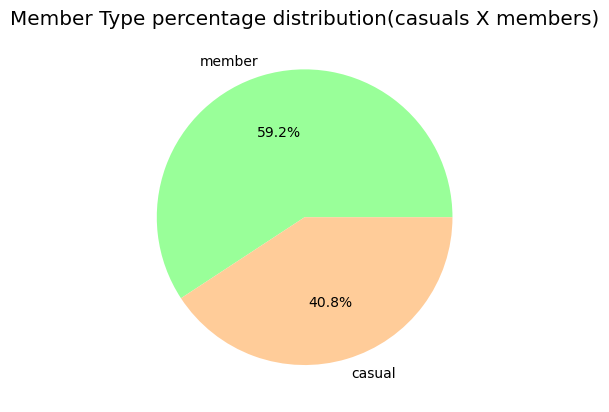

In [25]:
plt.pie(d.member_casual,labels=d.index,autopct='%1.1f%%',colors=['#99ff99', '#ffcc99','#ccff99'])
plt.title("Member Type percentage distribution(casuals X members)")
plt.show()

#### ●As we can see on the member x casual pie chart,

members have a bigger proporcion of the dataset ,59.2%(member) 40.8%(casual)
,member 19% bigger than the count of casual riders

## 2) Average Ride Duration Per Member Type

In [26]:
d6=data.groupby("member_casual").agg({"total_ride_length":"mean"})
d6

,total_ride_length
member_casual,
casual,29.628726
member,12.904822


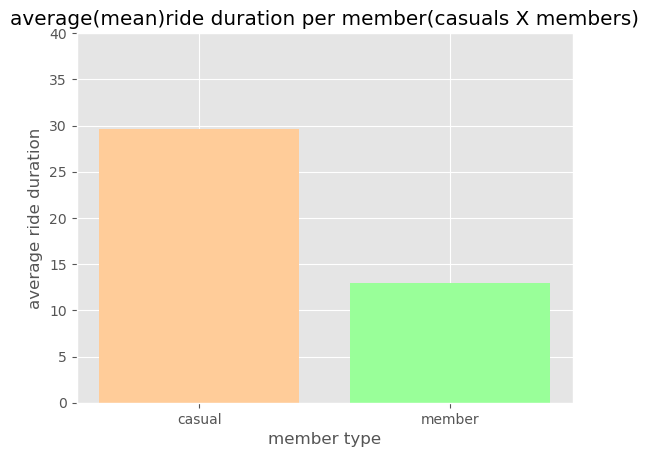

In [27]:
plt.bar(d6.index,d6.total_ride_length,color=['#ffcc99','#99ff99' ])
plt.title("average(mean)ride duration per member(casuals X members)")
plt.ylabel("average ride duration")
plt.xlabel("member type")
plt.ylim(0,40)
plt.show()

#### ●As we can see on the member x casual bar chart

    casual have more riding time thant members.

## rideable_type distribution graph

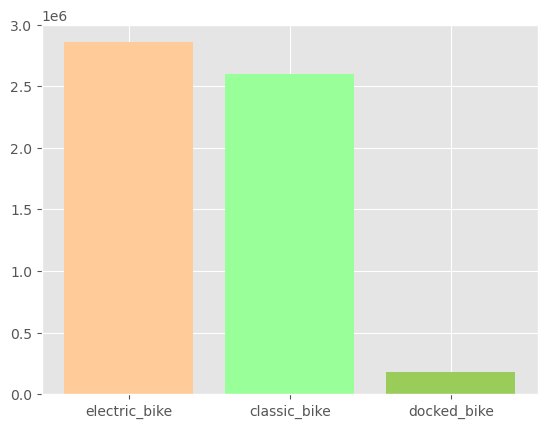

In [35]:
d1=data.rideable_type.value_counts()
d1=pd.DataFrame(d1)
color=['#ffcc99','#99ff99','#99cc59']
plt.bar(d1.index,d1.rideable_type,color=color)
plt.ylim(0,3000000)
plt.show()

#### The number of electric bikes is greater than that of classic bikes, and there is no longer any use for docked bikes

## Rideable Type Distribution by User Type

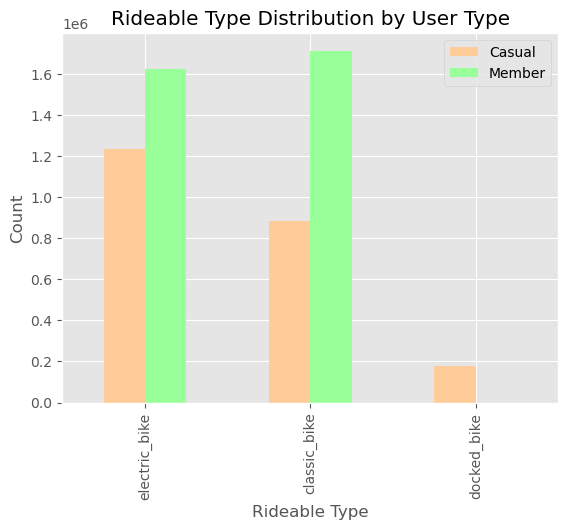

In [34]:
df = pd.concat([c1, m1] , axis=1)
df.columns = ['Casual', 'Member']
df.plot(kind='bar',color=['#ffcc99','#99ff99'])
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.title('Rideable Type Distribution by User Type')
plt.show()

#### Members make more use of bicycles in general and Members do not prefer riding docked bikes.

## the distribution of total ride count by users per month

In [36]:
d4=data.name_month.value_counts()
d4=pd.DataFrame(d4)
d4

,name_month
July,805674
August,768370
June,753820
September,685809
May,622444
October,545575
April,363933
November,330058
March,280933
January,184113


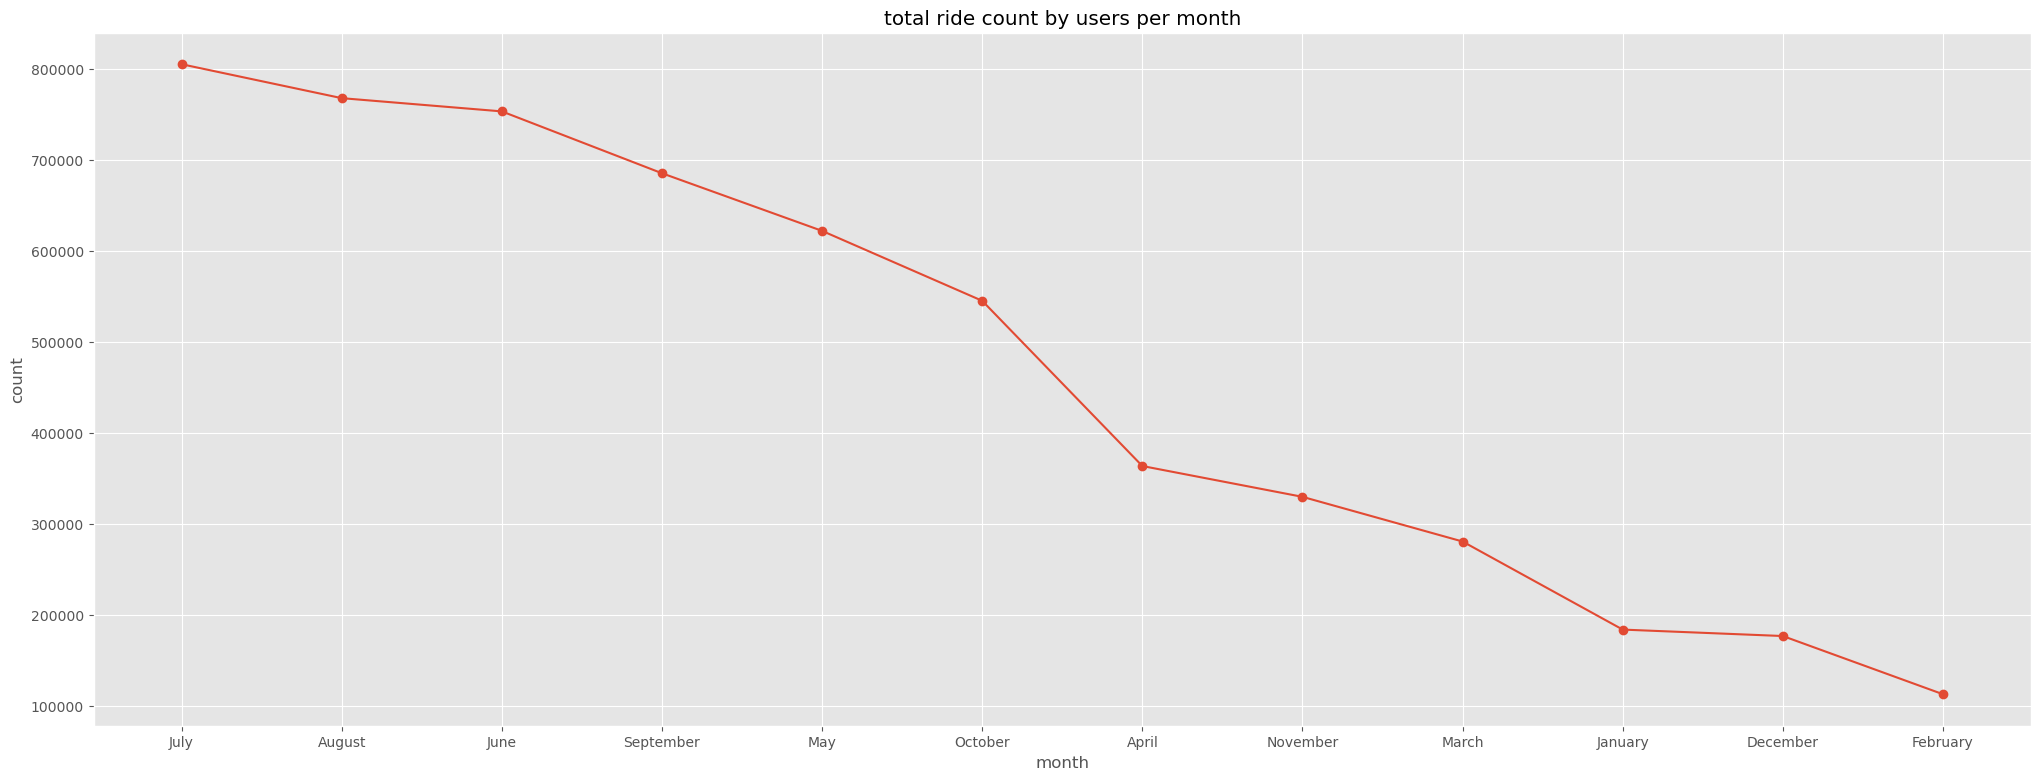

In [37]:
#co=['#000000','#001a13','#003326','#004d39','#004d39','#004d39','#009973','#009973','#009973','#009973','#009973','#009973']
plt.figure(figsize=(25,9))
plt.plot(d4.index,d4.name_month,'-o')
plt.title("total ride count by users per month")
plt.ylabel("count")
plt.xlabel("month")
plt.show()


#### The highest number of bike trips occurred in the month of July.

##  the distribution of total ride count by users per day 

In [38]:
d2=data.name_day.value_counts()
d2=pd.DataFrame(d2)
d2

,name_day
Saturday,901196
Thursday,834301
Wednesday,796781
Friday,795581
Tuesday,785653
Sunday,769804
Monday,747495


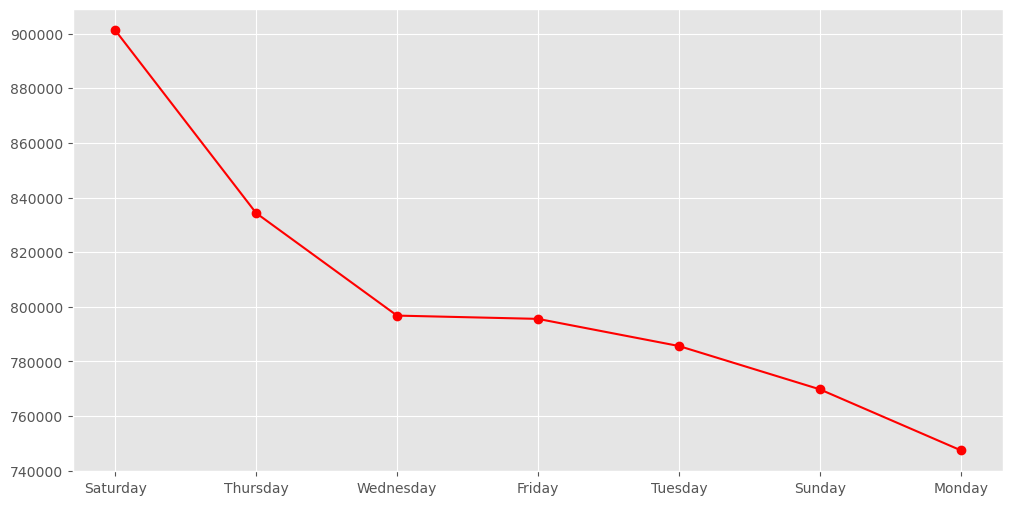

In [39]:
plt.figure(figsize=(12,6))
plt.plot(d2.index,d2.name_day,'-or')
plt.show()

## total ride distribution per day( casual X member )

In [40]:
m4=member.name_day.value_counts()
m4=pd.DataFrame(m4)
m4

,name_day
Thursday,528862
Wednesday,524424
Tuesday,522975
Monday,472175
Friday,465319
Saturday,436618
Sunday,385020


In [41]:
c4=casual.name_day.value_counts()
c4=pd.DataFrame(c4)
c4

,name_day
Saturday,464578
Sunday,384784
Friday,330262
Thursday,305439
Monday,275320
Wednesday,272357
Tuesday,262678


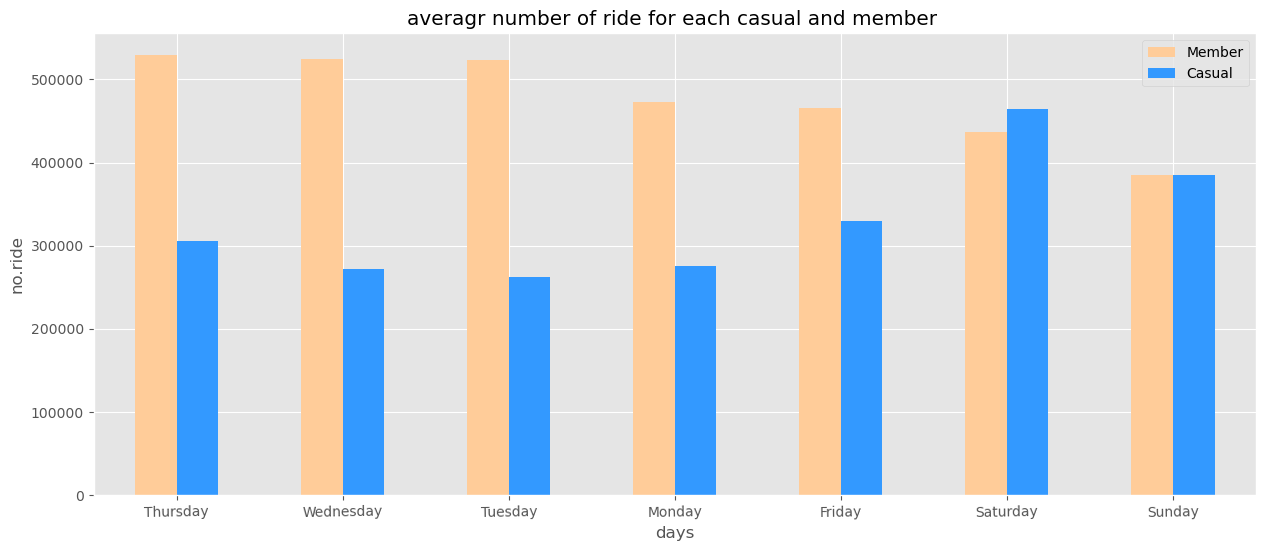

In [43]:
mrg=pd.concat([m4,c4],axis=1)
mrg.columns=['Member','Casual']
fig, ax = plt.subplots(figsize=(15,6))
mrg.plot(kind='bar',color=['#ffcc99','#3399ff'],ax=ax)
plt.title("averagr number of ride for each casual and member ")
plt.ylabel("no.ride")
plt.xlabel("days") 
plt.xticks(rotation=1)  # rotate the x-axis labels to be horizontal اسماء الايام الي تحت دي
plt.show()



### From the displayed chart, 
- we can see that the most popular days for bike rides among member riders are Thursday, while the most popular days for bike rides among casual riders are saturday and sunday



In [44]:
c2=casual.name_month.value_counts()
c2=pd.DataFrame(c2)
m2=member.name_month.value_counts()
m2=pd.DataFrame(m2)


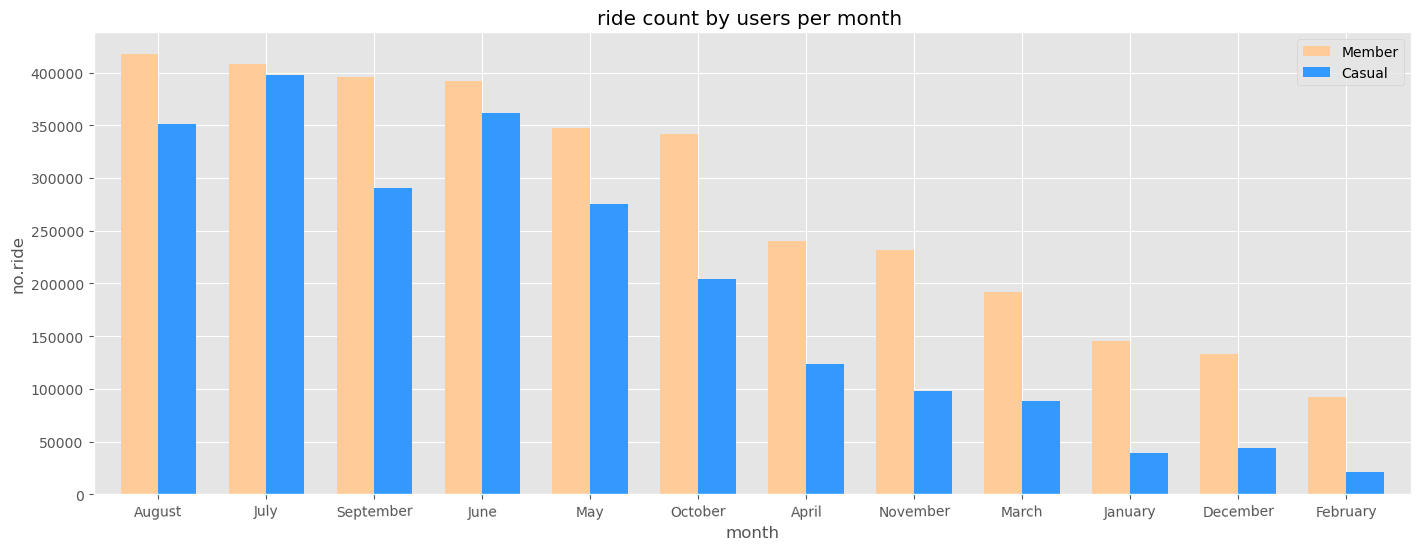

In [46]:
mrg=pd.concat([m2,c2],axis=1)
mrg.columns=['Member','Casual']
fig, ax = plt.subplots(figsize=(17,6))
mrg.plot(kind='bar',color=['#ffcc99','#3399ff'],ax=ax, width=0.7)
plt.title("ride count by users per month ")
plt.ylabel("no.ride")
plt.xlabel("month") 
plt.xticks(rotation=1)  # rotate the x-axis labels to be horizontal اسماء الايام الي تحت دي
plt.show()

From the displayed chart :

             ● the month contains the highest number of points for member in August and for casual in July
             ● In all months we have more members rides than casual rides
             ● I believe that temperature has a significant impact on the number of ride, but we do not know the nature of                      these months in this city on which the analysis is based

             

## Distribution by hour of the day

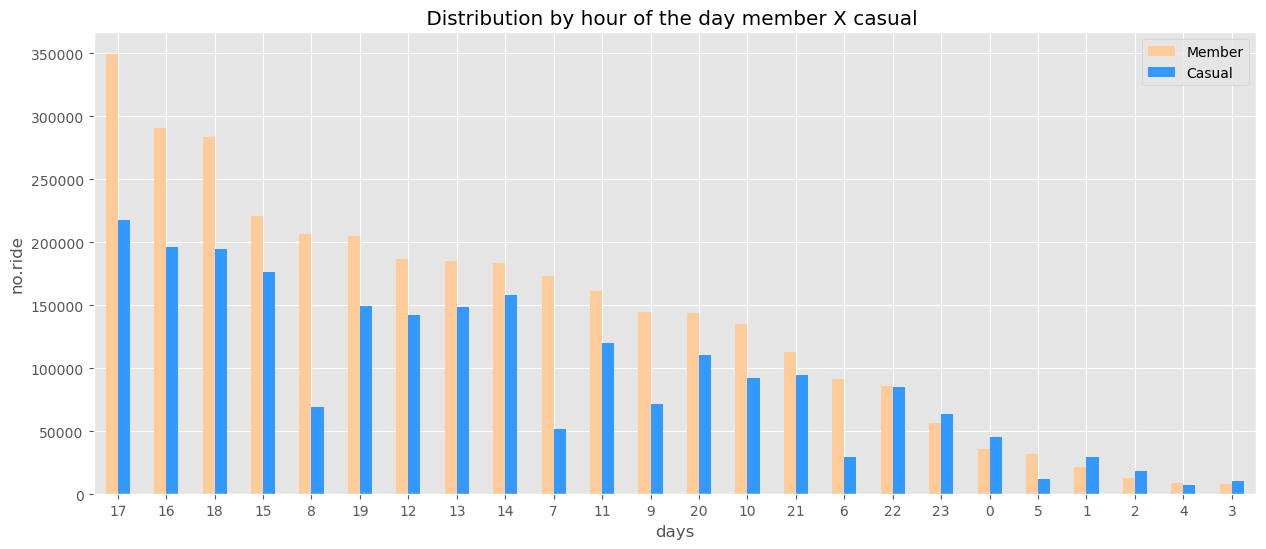

In [49]:
mem_h=member.hour.value_counts()
mem_h=pd.DataFrame(mem_h)
cas_h=casual.hour.value_counts()
cas_h=pd.DataFrame(cas_h)
mrg=pd.concat([mem_h,cas_h],axis=1)
mrg.columns=['Member','Casual']
fig, ax = plt.subplots(figsize=(15,6))
mrg.plot(kind='bar',color=['#ffcc99','#3399ff'],ax=ax)
plt.title(" Distribution by hour of the day member X casual  ")
plt.ylabel("no.ride")
plt.xlabel("days") 
#plt.xticks(rotation=1)
plt.xticks(range(0,24),rotation=1)# rotate the x-axis labels to be horizontal اسماء الايام الي تحت دي
plt.show()

From the displayed chart :

               ● The highest number of riders is from the beginning of 3 pm until 6 pm during the day.
               ● In all hours we have more members rides than casual rides

## casual and member

## the distribution of rideable type for casual

In [50]:
c1=casual.rideable_type.value_counts()
c1=pd.DataFrame(c1)
c1

,rideable_type
electric_bike,1232973
classic_bike,885694
docked_bike,176751


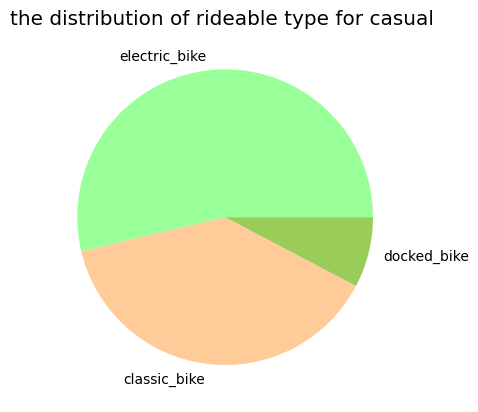

In [51]:
plt.pie(c1.rideable_type,labels=c1.index,colors=['#99ff99', '#ffcc99','#99cc59'])
plt.title("the distribution of rideable type for casual ")
plt.show()

## the distribution of rideable type for member

In [52]:
m1=member.rideable_type.value_counts()
m1=pd.DataFrame(m1)
m1

,rideable_type
classic_bike,1712342
electric_bike,1623051


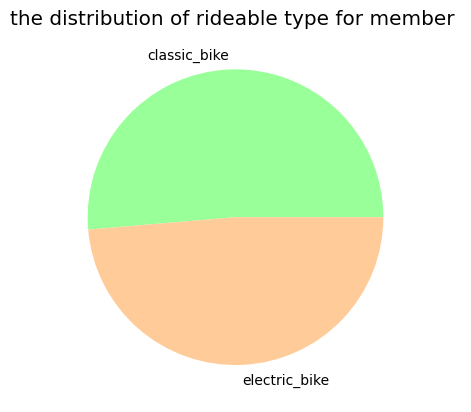

In [53]:
plt.pie(m1.rideable_type,labels=m1.index,colors=['#99ff99', '#ffcc99','#99cc59'])
plt.title("the distribution of rideable type for member ")
plt.show()

## ride count by users per month (casual)

In [54]:
c2=casual.name_month.value_counts()
c2=pd.DataFrame(c2)
c2

,name_month
July,397648
June,361929
August,351164
September,290384
May,275125
October,204205
April,124080
November,98383
March,88936
December,43746


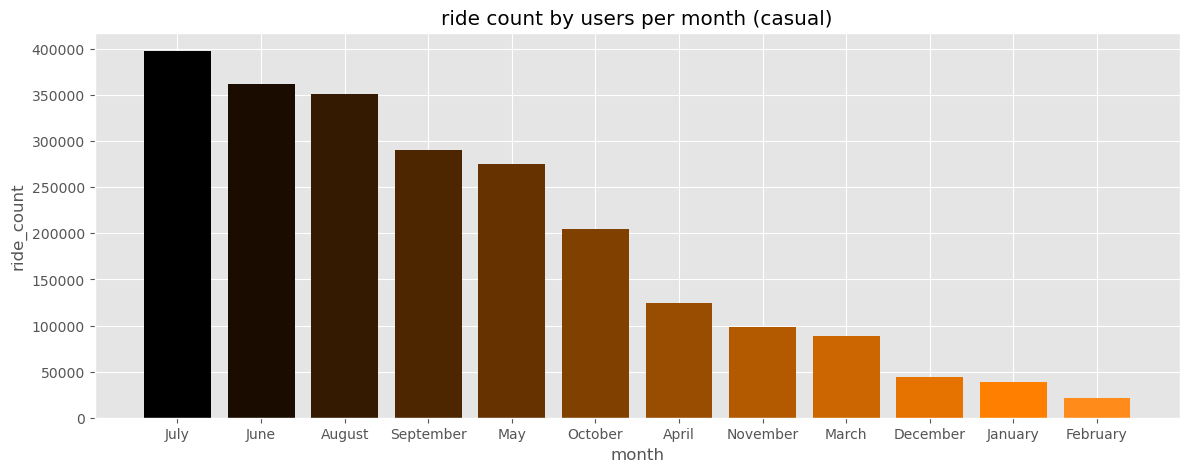

In [55]:
co=["#000000","#1a0d00",'#331a00','#4d2600','#663300',"#804000","#994d00",'#b35900','#cc6600','#e67300','#ff8000','#ff8c1a']

plt.figure(figsize=(14,5))
plt.bar(c2.index,c2.name_month,color=co)
plt.xlabel("month")
plt.ylabel("ride_count")
plt.title("ride count by users per month (casual)")
plt.show()

## ride count by users per month (member)

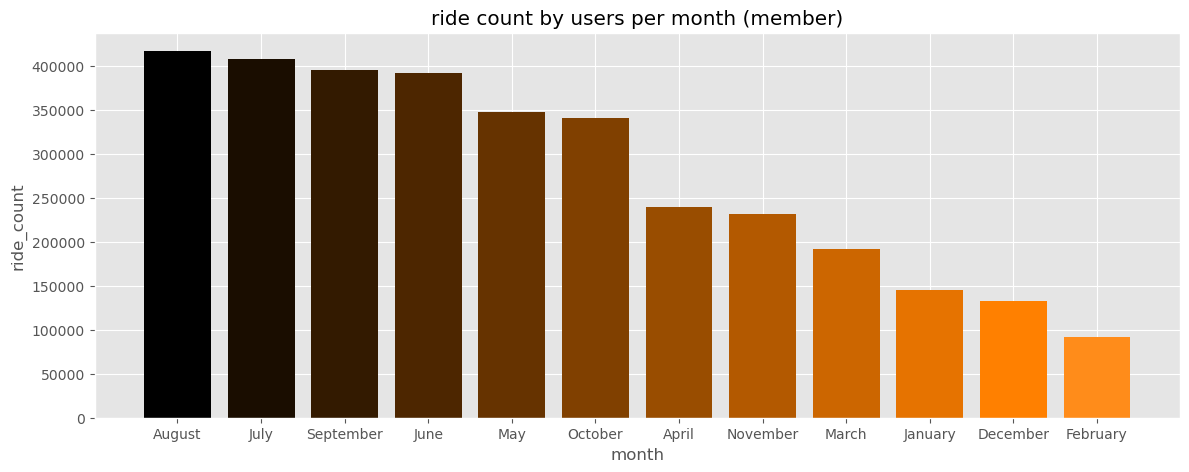

In [56]:
m2=member.name_month.value_counts()
m2=pd.DataFrame(m2)
plt.figure(figsize=(14,5))
plt.bar(m2.index,m2.name_month,color=co)
plt.xlabel("month")
plt.ylabel("ride_count")
plt.title("ride count by users per month (member)")
plt.show()

## average Duration per month (member) 

In [57]:
m3=member.groupby("name_month").agg({"total_ride_length":"mean"})
m3

,total_ride_length
name_month,
April,11.723297
August,13.688826
December,10.897764
February,11.660263
January,10.706461
July,14.025024
June,14.285694
March,12.093147
May,13.632637


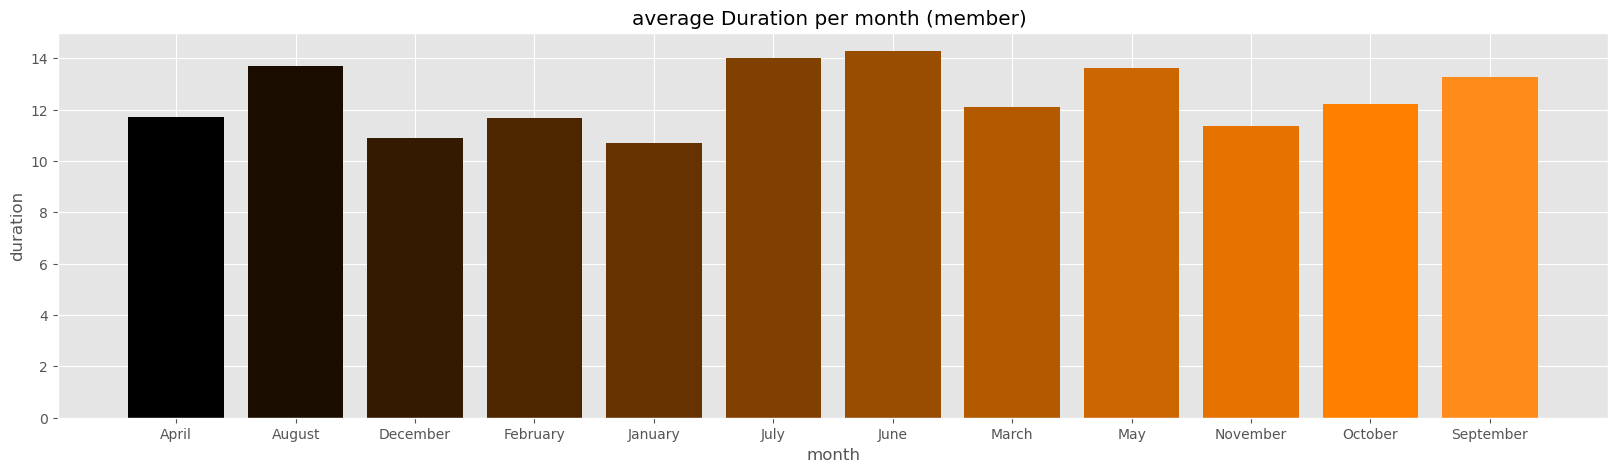

In [58]:
co2=["#000000","#1a0d00",'#331a00','#4d2600','#663300',"#804000","#994d00",'#b35900','#cc6600','#e67300','#ff8000','#ff8c1a']
plt.figure(figsize=(20,5))
plt.bar(m3.index,m3.total_ride_length,color=co2)
plt.title("average Duration per month (member) ")
plt.ylabel("duration")
plt.xlabel("month")
plt.show()

## average Duration per month (casual)

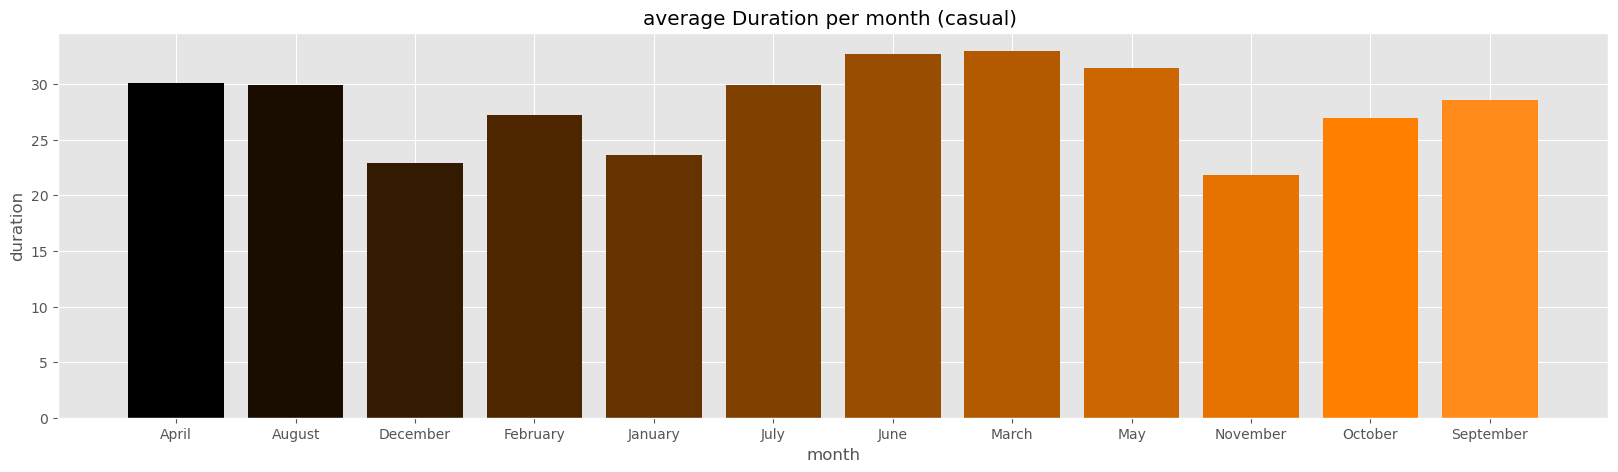

In [59]:
c3=casual.groupby("name_month").agg({"total_ride_length":"mean"})
co2=["#000000","#1a0d00",'#331a00','#4d2600','#663300',"#804000","#994d00",'#b35900','#cc6600','#e67300','#ff8000','#ff8c1a']
plt.figure(figsize=(20,5))
plt.bar(c3.index,c3.total_ride_length,color=co2)
plt.title("average Duration per month (casual) ")
plt.ylabel("duration")
plt.xlabel("month")
plt.show()

## Guiding questions


### ● How should you organize your data to perform analysis on it?
       
   - The 12 CSV files have been organized into a single file  
   
### ● Has your data been properly formatted?

  - Yes, the data has been properly formatted and the columns have the correct data types
       
### ● What surprises did you discover in the data?
       
 -  Accuracy in date and time was ensured for the columns. However, during the analysis process, it was noticed that there were differences between the casual and member values of the data, as well as differences in the rideable type used
       
### ● What trends or relationships did you find in the data?
    
  - members have a bigger proporcion of the dataset
  - members have more riding time thant casual


### ● How will these insights help answer your business questions?

   - These insights will help us understand the aspects and characteristics of the members.
       
## Key tasks
   
   1. Aggregate your data so it’s useful and accessible.
   2. Organize and format your data.
   3. Perform calculations.
   4. Identify trends and relationships.
   

## Deliverable

  ● A summary of your analysis

     

# Share

Let's wrap things up and come to a conclusion.
What do we know about data?
     
     ● The number of electric bikes is greater than that of classic bikes, and there is no longer any use for docked bikes
     ● Members make more use of bikes in general
     ● The highest number of bike trips occurred in the month of July. 
     ● Members do not prefer riding docked bikes.
     ● The highest number of riders is from the beginning of 3 pm until 6 pm during the day.
     ● members have a bigger proporcion of the dataset ,59.2%(member) 40.8%(casual),member 19% bigger than the count of                         casual riders
     ● the month contains the highest number of points for member in August and for casual in July 
     ● In all months we have more membr rides than casual rides
     ● the temperature has a significant impact on the number of ride, but we do not know the nature of                                                these months in this city on which the analysis is based
     ● In all hours we have more members rides than casual rides
     
     ● According to the weekend holidays, Saturday and Sunday, which are the least in the number of trips for member users,              while they are the most in the number of trips for casual
     
We can conclude that the members use rides formally like go to work or use it as an exercise, while casual users tend to use them more during holidays



## Guiding questions
### ● Were you able to answer the question of how annual members and casual riders use Cyclistic bikes differently?
  - Yes, because the data revealed the differences between casual riders and members
          
### ● What story does your data tell?

   - the members use rides formally like go to work or use it as an exercise, while casual users tend to use them more during holidays and the temperature has a significant impact on the number of ride 
        
### ● How do your findings relate to your original question?
        
   - The findings show the differences between types of bike riders and their respective uses
        
### ● Who is your audience? What is the best way to communicate with them?
    
   -   cyclistic marketing analytics team and Lily Moreno. The best way to communicate is Through this Jupyter file that contains the findings

### ● Can data visualization help you share your findings?
    
   - Yes, it is one of the fundamentals of findings.
    
### ● Is your presentation accessible to your audience?
      
  - Yes
      
## Key tasks
1. Determine the best way to share your findings.
2. Create effective data visualizations.
3. Present your findings.
4. Ensure your work is accessible.


## Deliverable

● Supporting visualizations and key findings











# Act

## Guiding questions
          
 ### ● What is your final conclusion based on your analysis?
        
 -    The conclusion is further stated on the share phase.
          
### ● How could your team and business apply your insights?
    
   - These ideas can be applied when preparing a marketing campaign to convert casual customers into members. The marketing campaign can focus on workers as an environmentally friendly way to commute to work.
    
    
### ● What next steps would you or your stakeholders take based on your findings?

  -      The marketing campaign can focus on workers as an environmentally friendly way to commute to work.


### ● Is there additional data you could use to expand on your findings?

   - there is some loss in the names of the stations
   
   - in need of weather-specific data
       
## Key tasks
1. Create your portfolio.
2. Add your case study.
3. Practice presenting your case study to a friend or family member

## Deliverable
#### Your top three recommendations based on your analysis

  -  The marketing campaign can focus on workers as an environmentally friendly way to commute to work.
  -  Increasing benefits for member bike riders such as distributing coupons and discounts for them, which will encourage casual riders to consider membership

  - As bikes are also used for recreation on weekends, ad campaigns can be made showing people using bikes for exercise during the week. The ads can focus on how practical and consistent bikes can be for daily use
